## About this implementation

# recognize hand written digits via mnist dataset

Step 1: Prepare data

In [33]:
import torch
import torchvision
from torchvision import datasets

# gather data 

mnist = datasets.MNIST(root='data/', download=True)
print(len(mnist))

100%|██████████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:00<00:00, 75585330.87it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 85366944.20it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 34735767.94it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 12019261.05it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

60000


In [35]:
X, y = mnist[0]
y

5

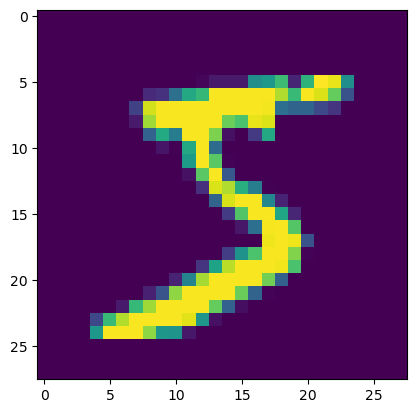

In [38]:
import matplotlib
import matplotlib.pyplot as plt

plt.imshow(X)

In [39]:
X, y = mnist

ValueError: too many values to unpack (expected 2)

#### Normalize the pixel values to [0,1]

In [51]:
import torchvision
import torchvision.transforms as transforms

# normalize the image data to be between [0,1] rather than [0,255] 
# helps to maintain gradients from exploding 

# use mu = 0.5
# use sigma = 0.5

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mu,std)])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


In [52]:
len(train_dataset)

60000

In [53]:
len(test_dataset)

10000

In [ ]:
# below code doesn't work after the normalization is applied, so just example here

In [68]:
example_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [71]:
image_tensor, label = example_dataset[0]
print(image_tensor.shape, label)

torch.Size([1, 28, 28]) 7


In [73]:
print(image_tensor)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [74]:
# show that the data is already normalized to be [0,1].. no need to do extra normalization
print(torch.max(image_tensor), torch.min(image_tensor))

tensor(1.) tensor(0.)


In [ ]:
# ok back to define model

In [54]:
from torch.utils.data import DataLoader

# create dataloaders

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

## Define the model

In [ ]:
class myCNN(torch.nn.Module):
    
    def __init__(self):
        super(myCNN, self).__init__()
            
                                # just 1 color channel at start
                                # use 32 filters, make 32 out channels
                                # use a kernel size of 3x3
                                # pad with 0's outside 1 layer
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        
        self.pool1 = torch.nn.MaxPool2d(kernel_size=1, stride=1)    # basically doesn't do anything different
        
        self.conv2 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)